<a href="https://colab.research.google.com/github/nazaninaslani/Demand-Forecasting-1/blob/main/SJ_feature_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install feature_engine


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import itertools
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
import seaborn as sns
from datetime import datetime, timedelta
# Load specific statistical tool for outlier detection
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.stattools import medcouple
import math
import datetime
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
#import pmdarima
#from pmdarima import auto_arima                              # for determining ARIMA orders
#normalizing input & output features
from sklearn.preprocessing import MinMaxScaler
#tools for evaluating the forecasting model
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# for Q-Q plots
import scipy.stats as stats
#####
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
####################
# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

In [ ]:
df_fselect = pd.read_csv('train_sj_NOoutlier.csv',parse_dates=['week_start_date'],index_col=0)

In [ ]:
Y = df_fselect[['total_cases']]
train_Ysj = Y[:-156]
valid_Ysj = Y[-156:]

In [ ]:
Y

,total_cases
week_start_date,
1990-05-05,4.0
1990-05-12,5.0
1990-05-19,4.0
1990-05-26,3.0
1990-06-02,6.0
...,...
2008-03-29,4.0
2008-04-05,3.0
2008-04-12,1.0


In [ ]:
nn = Y.diff(12)

In [ ]:
nnn=nn.iloc[12:]

In [ ]:
nnn.columns = ['diff']

In [ ]:
yyy = Y.iloc[:-12]

In [ ]:
yyy.reset_index(inplace=True)

In [ ]:
yyy = yyy.drop('week_start_date',axis=1)

In [ ]:
yyy

In [ ]:
df_undiff = pd.concat([nnn.reset_index(), yyy['total_cases']],axis=1)

In [ ]:
df_undiff

In [ ]:
df_undiff['new'] = df_undiff['total_cases'] +df_undiff['diff']

In [ ]:
Y.to_csv('df_eng.csv')

##Load Data

                 total_cases
week_start_date             
1990-05-05               4.0
1990-05-12               5.0
1990-05-19               4.0
1990-05-26               3.0
1990-06-02               6.0


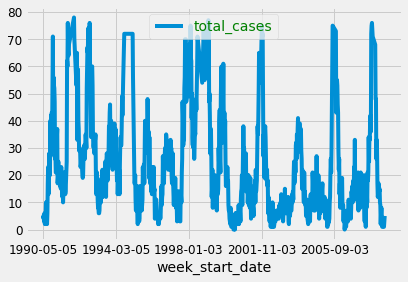

In [ ]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('df_eng.csv', header=0, index_col=0)
# display first few rows
print(series.head(5))
# line plot of dataset
series.plot()
pyplot.show()

##make stationary

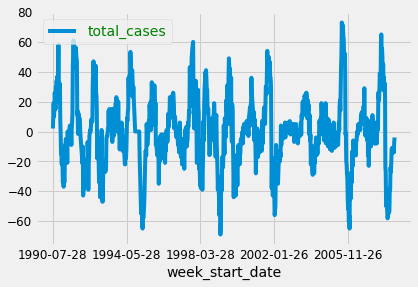

In [ ]:
# seasonally adjust the time series
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('df_eng.csv', header=0, index_col=0)
# seasonal difference
differenced = series.diff(12)
#differenced = series
# trim off the first year of empty data
differenced = differenced[12:]
# save differenced dataset to file
differenced.to_csv('seasonally_adjusted.csv', index=False)
# plot differenced dataset
differenced.plot()
pyplot.show()

#Autocorr

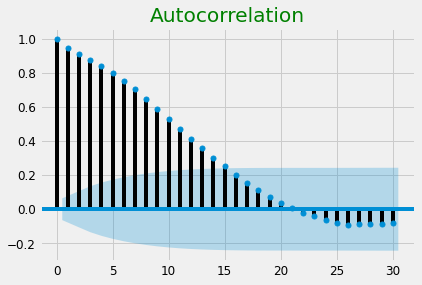

In [ ]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
series = read_csv('seasonally_adjusted.csv', header=0)
plot_acf(series)
pyplot.show()

##time series to supervised learning

In [ ]:
series

,total_cases
week_start_date,
1990-05-05,4.0
1990-05-12,5.0
1990-05-19,4.0
1990-05-26,3.0
1990-06-02,6.0
...,...
2008-03-29,4.0
2008-04-05,3.0
2008-04-12,1.0


In [ ]:
series

##XGBOOST

In [ ]:
from pandas import read_csv
from pandas import DataFrame
# load dataset
series = read_csv('seasonally_adjusted.csv', header=0)
#series = read_csv('df_eng.csv', header=0,index_col=0)
# reframe as supervised learning
dataframe = DataFrame()
for i in range(12,0,-1):
	dataframe['t-'+str(i)] = series.shift(i).values[:,0]
dataframe['t'] = series.values[:,0]
print(dataframe.head(14))
dataframe = dataframe[13:]
# save to new file
dataframe.to_csv('lags_12months_features.csv', index=False)

    t-12  t-11  t-10   t-9   t-8   t-7  ...   t-5   t-4   t-3   t-2   t-1     t
0    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   2.0
1    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   2.0  12.0
2    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   2.0  12.0  19.0
3    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   2.0  12.0  19.0  10.0
4    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   2.0  12.0  19.0  10.0  15.0
5    NaN   NaN   NaN   NaN   NaN   NaN  ...   2.0  12.0  19.0  10.0  15.0  26.0
6    NaN   NaN   NaN   NaN   NaN   NaN  ...  12.0  19.0  10.0  15.0  26.0  20.0
7    NaN   NaN   NaN   NaN   NaN   2.0  ...  19.0  10.0  15.0  26.0  20.0  15.0
8    NaN   NaN   NaN   NaN   2.0  12.0  ...  10.0  15.0  26.0  20.0  15.0  30.0
9    NaN   NaN   NaN   2.0  12.0  19.0  ...  15.0  26.0  20.0  15.0  30.0  21.0
10   NaN   NaN   2.0  12.0  19.0  10.0  ...  26.0  20.0  15.0  30.0  21.0  34.0
11   NaN   2.0  12.0  19.0  10.0  15.0  

In [ ]:
dataframe

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
13,12.000000,19.000000,10.0,15.0,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0
14,19.000000,10.000000,15.0,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0
15,10.000000,15.000000,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0
16,15.000000,26.000000,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0,23.0
17,26.000000,20.000000,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0,23.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,-53.857143,-54.428571,-53.0,-38.0,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0
923,-54.428571,-53.000000,-38.0,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0,-11.0
924,-53.000000,-38.000000,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0,-11.0,-14.0
925,-38.000000,-39.000000,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0,-11.0,-14.0,-7.0


In [ ]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

In [ ]:
series

In [ ]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [ ]:
data = series_to_supervised(series,n_in=12)

In [ ]:
data

array([[  2.,  12.,  19., ...,  34.,  31.,  37.],
       [ 12.,  19.,  10., ...,  31.,  37.,  20.],
       [ 19.,  10.,  15., ...,  37.,  20.,  34.],
       ...,
       [-53., -38., -39., ..., -11., -11., -14.],
       [-38., -39., -24., ..., -11., -14.,  -7.],
       [-39., -24., -27., ..., -14.,  -7.,  -4.]])

In [ ]:
yyy

In [ ]:
nnn

,diff
week_start_date,
1990-07-28,2.0
1990-08-04,12.0
1990-08-11,19.0
1990-08-18,10.0
1990-08-25,15.0
...,...
2008-03-29,-11.0
2008-04-05,-11.0
2008-04-12,-14.0


In [ ]:
!pip install xgboost

In [ ]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [ ]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [ ]:
train, test = train_test_split(data, 156)

In [ ]:
len(Y)

914

In [ ]:
len(data)

915

In [ ]:
len(test)

156

In [ ]:
len(data[-168:-12])

156

In [ ]:
m =data[-168:-12]

In [ ]:
m[:5]

In [ ]:
train, test = train_test_split(data, 156)
	# seed history with training dataset
history = [x for x in train]

In [ ]:
test

In [ ]:
testX, testy = test[i, :-1], test[i, -1]

In [ ]:
trainX, trainy = train[:, :-1], train[:, -1]

In [ ]:
history

In [ ]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, 1], predictions

In [ ]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

In [ ]:
dataframe

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
13,12.000000,19.000000,10.0,15.0,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0
14,19.000000,10.000000,15.0,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0
15,10.000000,15.000000,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0
16,15.000000,26.000000,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0,23.0
17,26.000000,20.000000,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0,23.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,-53.857143,-54.428571,-53.0,-38.0,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0
923,-54.428571,-53.000000,-38.0,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0,-11.0
924,-53.000000,-38.000000,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0,-11.0,-14.0
925,-38.000000,-39.000000,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0,-11.0,-14.0,-7.0


In [ ]:
mae, y, yhat = walk_forward_validation(data,156)

>expected=2.0, predicted=6.3
>expected=6.0, predicted=4.2
>expected=3.0, predicted=6.6
>expected=4.0, predicted=4.7
>expected=10.0, predicted=6.2
>expected=12.0, predicted=12.4
>expected=21.0, predicted=13.7
>expected=26.0, predicted=22.8
>expected=21.0, predicted=28.6
>expected=30.0, predicted=23.0
>expected=45.0, predicted=31.2
>expected=56.0, predicted=54.6
>expected=75.0, predicted=63.3
>expected=74.8, predicted=60.4
>expected=74.6, predicted=64.0
>expected=74.3, predicted=75.0
>expected=74.1, predicted=75.0
>expected=73.9, predicted=70.1
>expected=73.7, predicted=70.1
>expected=73.4, predicted=74.3
>expected=73.2, predicted=73.4
>expected=73.0, predicted=73.2
>expected=43.0, predicted=70.8
>expected=55.0, predicted=39.0
>expected=55.0, predicted=53.4
>expected=53.0, predicted=53.7
>expected=46.0, predicted=57.2
>expected=43.0, predicted=44.3
>expected=29.0, predicted=42.9
>expected=22.0, predicted=28.1
>expected=26.0, predicted=18.7
>expected=13.0, predicted=28.1
>expected=17.0, p

In [ ]:
len(yhat)

156

In [ ]:
data

In [ ]:
df_undiff[-20:-12]

,week_start_date,diff,total_cases
907,2007-12-15,-58.142857,70.142857
908,2007-12-22,-56.714286,69.714286
909,2007-12-29,-52.285714,69.285714
910,2008-01-05,-53.857143,68.857143
911,2008-01-12,-54.428571,68.428571
912,2008-01-19,-53.000000,68.000000
913,2008-01-26,-38.000000,48.000000
914,2008-02-02,-39.000000,48.000000


In [ ]:
dataframe.iloc[156:]

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
169,5.000000,7.000000,15.0,5.0,-7.0,13.0,6.0,15.0,-3.0,5.0,7.0,13.0,16.0
170,7.000000,15.000000,5.0,-7.0,13.0,6.0,15.0,-3.0,5.0,7.0,13.0,16.0,19.0
171,15.000000,5.000000,-7.0,13.0,6.0,15.0,-3.0,5.0,7.0,13.0,16.0,19.0,18.0
172,5.000000,-7.000000,13.0,6.0,15.0,-3.0,5.0,7.0,13.0,16.0,19.0,18.0,23.0
173,-7.000000,13.000000,6.0,15.0,-3.0,5.0,7.0,13.0,16.0,19.0,18.0,23.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,-53.857143,-54.428571,-53.0,-38.0,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0
923,-54.428571,-53.000000,-38.0,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0,-11.0
924,-53.000000,-38.000000,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0,-11.0,-14.0
925,-38.000000,-39.000000,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0,-11.0,-14.0,-7.0


MAE: 5.881


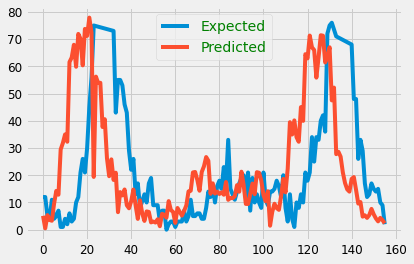

In [ ]:
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
len(y)

156

MAE: 7.613


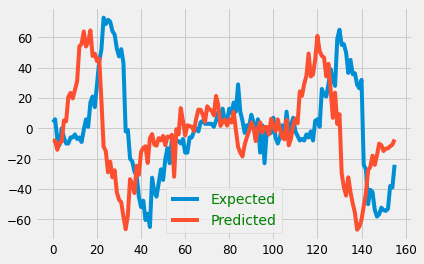

In [ ]:
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

MAE: 6.055


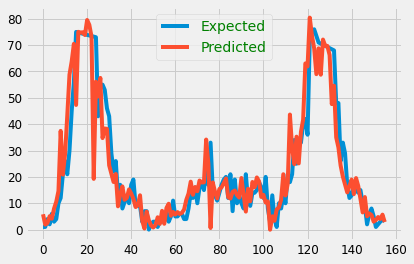

In [ ]:
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

MAE: 5.575


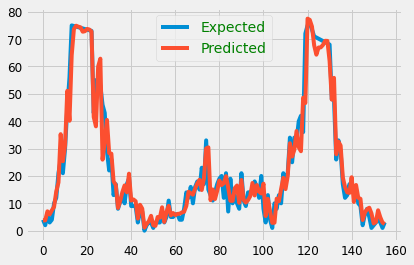

In [ ]:
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

MAE: 5.126


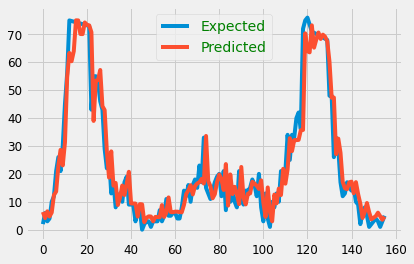

In [ ]:
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
def invert_difference(orig_data, diff_data, interval):
	return [diff_data[i-interval] + orig_data[i-interval] for i in range(interval, len(orig_data))]

In [ ]:
yhat

##feature selection

In [ ]:
'''
Less_Feature=['ndvi_se',
 'precipitation_amt_mm',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_min_temp_c',
 'station_precip_mm','total_cases']
 '''

In [ ]:
Less_Feature= ['ndvi_ne',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_tdtr_k',
 'station_diur_temp_rng_c',
 'station_precip_mm','total_cases']

In [ ]:
df_fselect_less = df_fselect[Less_Feature]

In [ ]:
df_fselect_less

,ndvi_ne,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,
1990-05-05,0.122600,0.198483,0.177617,12.42,297.572857,32.00,73.365714,2.628571,6.900000,16.0,4.0
1990-05-12,0.169900,0.162357,0.155486,22.82,298.211429,17.94,77.368571,2.371429,6.371429,8.6,5.0
1990-05-19,0.032250,0.157200,0.170843,34.54,298.781429,26.10,82.052857,2.300000,6.485714,41.4,4.0
1990-05-26,0.128633,0.227557,0.235886,15.36,298.987143,13.90,80.337143,2.428571,6.771429,4.0,3.0
1990-06-02,0.196200,0.251200,0.247340,7.52,299.518571,12.20,80.460000,3.014286,9.371429,5.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...
2008-03-29,0.077850,0.310471,0.296243,27.19,296.958571,7.55,74.247143,2.885714,5.785714,1.8,4.0
2008-04-05,-0.038000,0.119371,0.066386,3.82,298.081429,3.67,74.600000,2.714286,6.814286,0.5,3.0
2008-04-12,-0.155200,0.137757,0.141214,16.96,297.460000,35.00,75.027143,2.185714,5.714286,30.7,1.0


In [ ]:
Y

In [ ]:
#zz = Y.diff(12)
#zz = df_fselect_less.diff(12)
zz = df_fselect_less

In [ ]:
zz

In [ ]:
zz.iloc[12:]

In [ ]:
yyy = zz.iloc[13:-12]

In [ ]:
yyy

In [ ]:
dataframe

In [ ]:
yyy

In [ ]:
#df_two = pd.concat([yyy.reset_index(), dataframe.reset_index()],axis=1)
df_two = pd.concat([yyy.reset_index(), dataframe.reset_index()],axis=1)

In [ ]:
df_two.drop(['index','total_cases'],inplace=True,axis=1)

In [ ]:
df_two.set_index('week_start_date',inplace=True)

In [ ]:
df_two

,ndvi_ne,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
week_start_date,,,,,,,,,,,,,,,,,,,,,,,
1990-08-04,0.160483,0.379700,0.381357,32.66,299.862857,34.60,80.584286,2.585714,8.085714,37.6,12.000000,19.000000,10.0,15.0,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0
1990-08-11,0.170400,0.164443,0.138857,28.80,300.391429,20.00,79.650000,2.328571,7.557143,11.4,19.000000,10.000000,15.0,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0
1990-08-18,0.180317,0.206957,0.168243,90.75,299.958571,101.90,84.178571,1.857143,6.685714,44.7,10.000000,15.000000,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0
1990-08-25,0.190233,0.167657,0.172286,32.40,300.332857,25.90,80.947143,2.485714,7.014286,5.4,15.000000,26.000000,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0,23.0
1990-09-01,0.252900,0.264171,0.284314,40.94,300.118571,39.80,83.348571,1.900000,6.528571,13.7,26.000000,20.000000,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0,23.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-01-05,0.000600,0.239814,0.195557,0.00,298.038571,27.99,76.148571,1.842857,5.300000,55.5,-53.857143,-54.428571,-53.0,-38.0,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0
2008-01-12,-0.008533,0.330486,0.244286,37.24,298.142857,37.66,76.131429,2.057143,5.014286,64.8,-54.428571,-53.000000,-38.0,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0,-11.0
2008-01-19,-0.017667,0.125000,0.108843,0.00,297.627143,4.10,75.642857,3.000000,5.628571,2.5,-53.000000,-38.000000,-39.0,-24.0,-27.0,-21.0,-12.0,-11.0,-11.0,-14.0,-11.0,-11.0,-14.0


In [ ]:
df_feature_selection = df_two.reset_index()

In [ ]:
df_feature_selection['weeknum'] = df_feature_selection['week_start_date'].dt.week

In [ ]:
df_feature_selection['year'] = df_feature_selection['week_start_date'].dt.year

In [ ]:
df_feature_selection.head()

,week_start_date,ndvi_ne,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,1990-08-04,-0.009417,0.217343,0.225871,9.84,1.651429,16.66,3.215714,0.214286,1.714286,29.0,12.0,19.0,10.0,15.0,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0
1,1990-08-11,0.138150,0.007243,-0.031986,-5.74,1.610000,-6.10,-2.402857,0.028571,1.071429,-30.0,19.0,10.0,15.0,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0
2,1990-08-18,0.051683,-0.020600,-0.067643,75.39,0.971429,88.00,3.841429,-0.571429,-0.085714,40.7,10.0,15.0,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0
3,1990-08-25,-0.005967,-0.083543,-0.075054,24.88,0.814286,13.70,0.487143,-0.528571,-2.357143,-0.4,15.0,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0,23.0
4,1990-09-01,0.098350,0.009857,0.102571,31.36,0.488571,13.31,3.457143,-0.200000,-0.414286,-25.4,26.0,20.0,15.0,30.0,21.0,34.0,31.0,37.0,20.0,34.0,58.0,23.0,28.0


In [ ]:
df_feature_selection

In [ ]:
df_feature_selection.columns

In [ ]:
df_feature_selection = df_feature_selection.astype({'weeknum': 'str','year':'str'}) 
df_feature_selection = df_feature_selection.astype({'weeknum': 'str','year':'str'}) 

In [ ]:
df_feature_selection.set_index('week_start_date',inplace=True)

In [ ]:
df_feature_selection.dtypes

In [ ]:
df_feature_selection

In [ ]:
X = df_feature_selection.drop('t',axis=1)
Y = df_feature_selection[['t']]
train_Xsj, train_Ysj = X[:-131], Y[:-131]
valid_Xsj, valid_Ysj = X[-131:], Y[-131:]

In [ ]:
train_Ysj

In [ ]:
# Feature-Engine's one hot encoder also selects
# all categorical variables automatically

ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    drop_last=True)  # to return k-1, false to return k


train_Xsj_encoded = ohe_enc.fit_transform(train_Xsj.fillna('Missing'))
valid_Xsj_encoded = ohe_enc.fit_transform(valid_Xsj.fillna('Missing'))

#train_Ysj_encoded = ohe_enc.fit_transform(train_Ysj.fillna('Missing'))
#valid_Ysj_encoded = ohe_enc.fit_transform(valid_Ysj.fillna('Missing'))

In [ ]:
df_feature_selection.set_index('week_start_date',inplace=True)

In [ ]:
#train_Xsj_encoded

In [ ]:
colss = X.columns

In [ ]:
colss = ['ndvi_ne',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_tdtr_k',
 'station_diur_temp_rng_c',
 'station_precip_mm']

In [ ]:
cc = train_Xsj.columns

In [ ]:
cc

Index(['ndvi_ne', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_precip_mm', 't-12', 't-11', 't-10',
       't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1'],
      dtype='object')

In [ ]:
'''
X = df_feature_selection.drop('t',axis=1)
Y = df_feature_selection[['t']]
train_Xsj, train_Ysj = X[:-131], Y[:-131]
valid_Xsj, valid_Ysj = X[-131:], Y[-131:]
'''

In [ ]:
colss = X.columns

In [ ]:
train_Ysj['t']

week_start_date
1990-08-04    0.850089
1990-08-11    1.464250
1990-08-18    2.517099
1990-08-25    0.981695
1990-09-01    1.201038
                ...   
2005-07-02    2.263635
2005-07-09    1.859069
2005-07-16   -0.115022
2005-07-23   -0.071154
2005-07-30   -0.904659
Name: t, Length: 783, dtype: float64

In [ ]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_Xsj.loc[:][colss])

# transform train and test sets
train_Xsj.loc[:][colss] = scaler.transform(train_Xsj.loc[:][colss])
valid_Xsj.loc[:][colss]= scaler.transform(valid_Xsj.loc[:][colss])
#test_iq_clean_less_encoded.loc[:][columns_to_scale]= scaler.transform(test_iq_clean_less_encoded.loc[:][columns_to_scale])
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_Ysj)

# transform train and test sets
train_Ysj.loc[:]['t'] = scaler.transform(train_Ysj)
valid_Ysj.loc[:]['t']= scaler.transform(valid_Ysj)

In [ ]:
train_Xsj.columns

Index(['ndvi_ne', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_precip_mm', 't-12', 't-11', 't-10',
       't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1'],
      dtype='object')

In [ ]:
train_Xsj

In [ ]:
cols3 = ['ndvi_ne', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_precip_mm']

In [ ]:
'''
df_fselect = pd.read_csv('train_sj_NOoutlier.csv',parse_dates=['week_start_date'],index_col=0)
df_fselect = df_fselect.drop(['year','weekofyear'],axis=1)
X = df_fselect.drop('total_cases',axis=1)
Y = df_fselect[['total_cases']]
train_Xsj, train_Ysj = X[:-156], Y[:-156]
valid_Xsj, valid_Ysj = X[-156:], Y[-156:]
'''

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
train_Xsj

,ndvi_ne,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
week_start_date,,,,,,,,,,,,,,,,,,,,,,
1990-08-04,-0.062074,2.789689,2.858133,0.141030,1.038949,0.322460,0.688446,0.306014,1.528513,0.692104,12.0,19.000000,10.000000,15.000000,26.000000,20.000000,15.000000,30.000000,21.000000,34.000000,31.000000,37.000000
1990-08-11,1.134042,0.101720,-0.395492,-0.094701,1.012591,-0.121649,-0.510876,0.028738,0.958476,-0.731639,19.0,10.000000,15.000000,26.000000,20.000000,15.000000,30.000000,21.000000,34.000000,31.000000,37.000000,20.000000
1990-08-18,0.433178,-0.254495,-0.845409,1.132827,0.606309,1.714496,0.822009,-0.867075,-0.067592,0.974439,10.0,15.000000,26.000000,20.000000,15.000000,30.000000,21.000000,34.000000,31.000000,37.000000,20.000000,34.000000
1990-08-25,-0.034110,-1.059772,-0.938927,0.368591,0.506329,0.264703,0.106014,-0.803089,-2.081726,-0.017354,15.0,26.000000,20.000000,15.000000,30.000000,21.000000,34.000000,31.000000,37.000000,20.000000,34.000000,58.000000
1990-09-01,0.811439,0.135165,1.302342,0.466636,0.299098,0.257093,0.739980,-0.312524,-0.358945,-0.620635,26.0,20.000000,15.000000,30.000000,21.000000,34.000000,31.000000,37.000000,20.000000,34.000000,58.000000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-07-02,0.700798,-0.415545,-0.768230,0.142241,1.248907,0.399145,0.431078,-0.653786,-0.586960,1.075791,14.0,29.000000,44.000000,52.000000,73.000000,68.777778,71.555556,70.333333,64.111111,61.888889,52.666667,47.444444
2005-07-09,1.707512,0.254727,1.484582,0.118788,1.318893,0.167139,0.370700,-0.675115,-1.676365,0.322896,29.0,44.000000,52.000000,73.000000,68.777778,71.555556,70.333333,64.111111,61.888889,52.666667,47.444444,52.222222
2005-07-16,0.294437,0.251802,0.358851,0.743220,0.404531,0.810668,0.710401,-1.677573,-1.828376,-1.081541,44.0,52.000000,73.000000,68.777778,71.555556,70.333333,64.111111,61.888889,52.666667,47.444444,52.222222,43.000000


In [ ]:
train_Xsj

,ndvi_ne,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
week_start_date,,,,,,,,,,,,,,,,,,,,,,
1990-08-04,-0.062074,2.789689,2.858133,0.141030,1.038949,0.322460,0.688446,0.306014,1.528513,0.692104,0.529430,0.838368,0.427314,0.643804,1.125108,0.854025,0.629776,1.284665,0.886520,1.452072,1.324718,1.590916
1990-08-11,1.134042,0.101720,-0.395492,-0.094701,1.012591,-0.121649,-0.510876,0.028738,0.958476,-0.731639,0.846637,0.432940,0.651188,1.133336,0.859375,0.633438,1.289628,0.889719,1.455743,1.320933,1.587347,0.845966
1990-08-18,0.433178,-0.254495,-0.845409,1.132827,0.606309,1.714496,0.822009,-0.867075,-0.067592,0.974439,0.438800,0.658178,1.143710,0.866319,0.637931,1.295198,0.893717,1.460197,1.324384,1.583210,0.843231,1.459454
1990-08-25,-0.034110,-1.059772,-0.938927,0.368591,0.506329,0.264703,0.106014,-0.803089,-2.081726,-0.017354,0.665376,1.153700,0.875062,0.643804,1.302264,0.898142,1.465588,1.328548,1.587102,0.840091,1.456032,2.511148
1990-09-01,0.811439,0.135165,1.302342,0.466636,0.299098,0.257093,0.739980,-0.312524,-0.358945,-0.620635,1.163843,0.883415,0.651188,1.311347,0.903664,1.471668,1.333618,1.591845,0.842734,1.452072,2.506549,0.977428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-07-02,0.700798,-0.415545,-0.768230,0.142241,1.248907,0.399145,0.431078,-0.653786,-0.586960,1.075791,0.620061,1.288843,1.949656,2.290410,3.206685,3.005971,3.117662,3.054608,2.774199,2.671175,2.273101,2.048598
2005-07-09,1.707512,0.254727,1.484582,0.118788,1.318893,0.167139,0.370700,-0.675115,-1.676365,0.322896,1.299789,1.964555,2.307854,3.224970,3.019687,3.128520,3.063896,2.781559,2.676896,2.268045,2.044516,2.257963
2005-07-16,0.294437,0.251802,0.358851,0.743220,0.404531,0.810668,0.710401,-1.677573,-1.828376,-1.081541,1.979518,2.324935,3.248124,3.037069,3.142712,3.074598,2.790180,2.684041,2.273088,2.039767,2.253647,1.853840


In [ ]:
train_Xsj[colss]

,ndvi_ne,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm
week_start_date,,,,,,,,,,
1990-08-04,-0.062074,2.789689,2.858133,0.141030,1.038949,0.322460,0.688446,0.306014,1.528513,0.692104
1990-08-11,1.134042,0.101720,-0.395492,-0.094701,1.012591,-0.121649,-0.510876,0.028738,0.958476,-0.731639
1990-08-18,0.433178,-0.254495,-0.845409,1.132827,0.606309,1.714496,0.822009,-0.867075,-0.067592,0.974439
1990-08-25,-0.034110,-1.059772,-0.938927,0.368591,0.506329,0.264703,0.106014,-0.803089,-2.081726,-0.017354
1990-09-01,0.811439,0.135165,1.302342,0.466636,0.299098,0.257093,0.739980,-0.312524,-0.358945,-0.620635
...,...,...,...,...,...,...,...,...,...,...
2005-07-02,0.700798,-0.415545,-0.768230,0.142241,1.248907,0.399145,0.431078,-0.653786,-0.586960,1.075791
2005-07-09,1.707512,0.254727,1.484582,0.118788,1.318893,0.167139,0.370700,-0.675115,-1.676365,0.322896
2005-07-16,0.294437,0.251802,0.358851,0.743220,0.404531,0.810668,0.710401,-1.677573,-1.828376,-1.081541


In [ ]:
colss

['ndvi_ne',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_tdtr_k',
 'station_diur_temp_rng_c',
 'station_precip_mm']

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train_Xsj[colss], train_Ysj)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf.feature_importances_

array([0.06605312, 0.05817094, 0.05759477, 0.05188402, 0.43037021,
       0.05783406, 0.1066182 , 0.04844983, 0.07005829, 0.05296655])

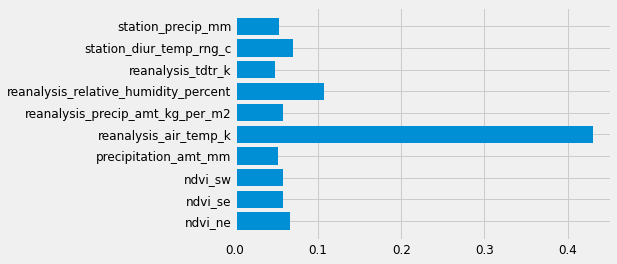

In [ ]:
plt.barh(colss, rf.feature_importances_);

In [ ]:
plt.barh()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
#model = ExtraTreesClassifier(n_estimators=10)
#model.fit(train_Xiq, train_Yiq)
#print(model.feature_importances_)
sel_ = SelectFromModel(RandomForestRegressor(n_estimators=500, random_state=10))
sel_.fit(train_Xsj[colss], train_Ysj)
#sel_.fit(train_Xsj_encoded, train_Ysj)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=500, n_jobs=None,
                                                oob_score=False,
                                                random_state=10, verbose=0,
                                                warm_

In [ ]:
train_XsjN = train_Xsj[cols3]

In [ ]:
train_XsjN

In [ ]:
# let's make a list and count the selected features
#selected_feat = train_Xsj_encoded.columns[(sel_.get_support())]
selected_feat = train_XsjN.columns[(sel_.get_support())]
len(selected_feat)

1

In [ ]:
selected_feat

Index(['reanalysis_air_temp_k'], dtype='object')

In [ ]:
cols3

['ndvi_ne',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_tdtr_k',
 'station_diur_temp_rng_c',
 'station_precip_mm']

In [ ]:
train_Xsj1 = train_Xsj[colss]

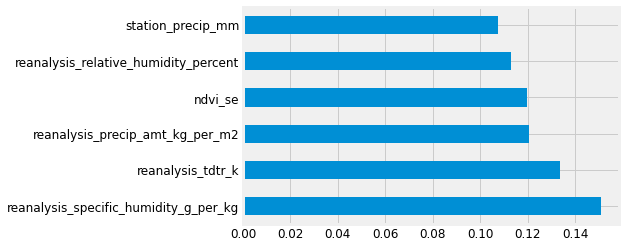

In [ ]:
(pd.Series(sel_.estimator_.feature_importances_ , index=train_Xsj1.columns)
   .nlargest(6)
   .plot(kind='barh'))  ;

In [ ]:
# and now, let's compare the  amount of selected features
# with the amount of features which importance is above the
# mean importance, to make sure we understand the output of
# sklearn

print('total features: {}'.format((train_Xiq.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

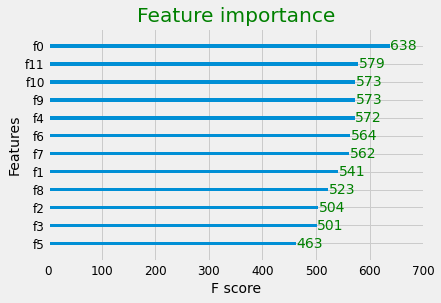

In [ ]:
# plot feature importance using built-in function
from numpy import loadtxt
#from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot

# fit model no training data
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainX, trainy)
	# make a one-step prediction
yhat = model.predict([testX])

#model = XGBRegressor()
#model.fit(train_Xsj[colss], train_Ysj)
# plot feature importance
plot_importance(model)
pyplot.show()

In [ ]:
trainy

In [ ]:
train_df_feature_selection_encoded.columns

Index(['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1', 't', 'weeknum_31', 'weeknum_32', 'weeknum_33',
       'weeknum_34', 'weeknum_35', 'weeknum_36', 'weeknum_37', 'weeknum_38',
       'weeknum_39', 'weeknum_40', 'weeknum_41', 'weeknum_42', 'weeknum_43',
       'weeknum_44', 'weeknum_45', 'weeknum_46', 'weeknum_47', 'weeknum_48',
       'weeknum_49', 'weeknum_50', 'weeknum_51', 'weeknum_52', 'weeknum_1',
       'weeknum_2', 'weeknum_3', 'weeknum_4', 'weeknum_5', 'weeknum_6',
       'weeknum_7', 'weeknum_8', 'weeknum_9', 'weeknum_10', 'weeknum_11',
       'weeknum_12', 'weeknum_13', 'weeknum_14', 'weeknum_15', 'weeknum_16',
       'weeknum_17', 'weeknum_18', 'weeknum_19', 'weeknum_20', 'weeknum_21',
       'weeknum_22', 'weeknum_23', 'weeknum_24', 'weeknum_25', 'weeknum_26',
       'weeknum_27', 'weeknum_28', 'weeknum_29', 'weeknum_30', 'year_1990',
       'year_1991', 'year_1992', 'year_1993', 'year_1994', 'year_1995',
       'year_1996', 

In [ ]:
train_df_feature_selection_encoded[['t-12','t-4']]

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t,weeknum_31,weeknum_32,weeknum_33,weeknum_34,weeknum_35,weeknum_36,weeknum_37,weeknum_38,weeknum_39,weeknum_40,weeknum_41,weeknum_42,weeknum_43,weeknum_44,weeknum_45,weeknum_46,weeknum_47,weeknum_48,weeknum_49,weeknum_50,weeknum_51,weeknum_52,weeknum_1,weeknum_2,weeknum_3,weeknum_4,weeknum_5,weeknum_6,weeknum_7,weeknum_8,weeknum_9,weeknum_10,weeknum_11,weeknum_12,weeknum_13,weeknum_14,weeknum_15,weeknum_16,weeknum_17,weeknum_18,weeknum_19,weeknum_20,weeknum_21,weeknum_22,weeknum_23,weeknum_24,weeknum_25,weeknum_26,weeknum_27,weeknum_28,weeknum_29,weeknum_30,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004
week_start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-08-04,12.0,19.000000,10.000000,15.000000,26.000000,20.000000,15.000000,30.000000,21.000000,34.000000,31.000000,37.000000,20.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990-08-11,19.0,10.000000,15.000000,26.000000,20.000000,15.000000,30.000000,21.000000,34.000000,31.000000,37.000000,20.000000,34.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990-08-18,10.0,15.000000,26.000000,20.000000,15.000000,30.000000,21.000000,34.000000,31.000000,37.000000,20.000000,34.000000,58.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990-08-25,15.0,26.000000,20.000000,15.000000,30.000000,21.000000,34.000000,31.000000,37.000000,20.000000,34.000000,58.000000,23.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990-09-01,26.0,20.000000,15.000000,30.000000,21.000000,34.000000,31.000000,37.000000,20.000000,34.000000,58.000000,23.000000,28.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-07-02,14.0,29.000000,44.000000,52.000000,73.000000,68.777778,71.555556,70.333333,64.111111,61.888889,52.666667,47.444444,52.222222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-07-09,29.0,44.000000,52.000000,73.000000,68.777778,71.555556,70.333333,64.111111,61.888889,52.666667,47.444444,52.222222,43.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-07-16,44.0,52.000000,73.000000,68.777778,71.555556,70.333333,64.111111,61.888889,52.666667,47.444444,52.222222,43.000000,-2.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[0.06196818 0.05895868 0.06102847 0.05875706 0.05834461 0.05868108
 0.05087804 0.05674613 0.05904644 0.06192267 0.07767923 0.07038249
 0.07461465 0.00343666 0.00342518 0.00292701 0.00234497 0.00226549
 0.00251481 0.00209539 0.0027178  0.00272818 0.00282999 0.00322162
 0.00418005 0.00413221 0.00522855 0.00410204 0.0048697  0.006217
 0.00668002 0.00650945 0.0063303  0.00453629 0.00426325 0.00361266
 0.00385737 0.00573186 0.00405785 0.00360042 0.00267282 0.00271744
 0.0023202  0.00252456 0.00221882 0.00195995 0.00232322 0.00117601
 0.00192082 0.00185244 0.00263075 0.00281392 0.00140437 0.00140691
 0.00155144 0.00187239 0.00327545 0.00209798 0.00221876 0.00325307
 0.00331628 0.00257435 0.00256251 0.00251138 0.00243609 0.
 0.00162311 0.00055027 0.00347922 0.00162382 0.00072445 0.00317502
 0.0011269  0.00199714 0.00033543 0.00259692 0.00168153 0.00466788
 0.00138251]


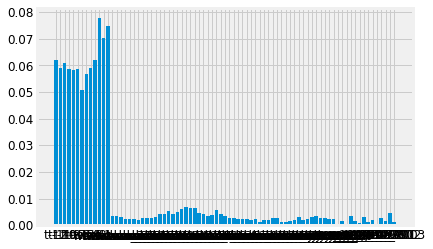

In [ ]:
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# load data
#dataframe = read_csv('lags_12months_features.csv', header=0)
dataframe=train_df_feature_selection_encoded
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

In [ ]:
model.feature_importances_[:5]

array([0.06196818, 0.05895868, 0.06102847, 0.05875706, 0.05834461])

Selected Features:
t-12
t-11
t-10
t-9
t-8
t-4
t-3
t-2
t-1
t


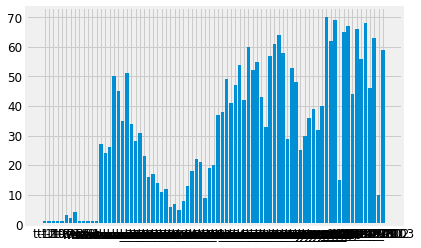

In [ ]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# load dataset
#dataframe = read_csv('lags_12months_features.csv', header=0)
dataframe=train_df_feature_selection_encoded
# separate into input and output variables
array = dataframe.values
X = array[:,0:-1]
y = array[:,-1]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=6)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

##creat lag features